In [19]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import os

############################Part 1 collecting data############################
#in the dataset, there are multiple data i will use in this project, one is in the business
input_path = '/Users/chenkaideng/Tom Chen/Brown/Fall 2025/DATA 1030/Coding/Final Project/SubsetLarge/yelp_academic_dataset_business.json'
output_path = '/Users/chenkaideng/Tom Chen/Brown/Fall 2025/DATA 1030/Coding/Final Project/SubsetLarge/yelp_business_fixed.json'#to do this convert to fixed json file to avoid error in load data error

with open(input_path, 'r') as fin, open(output_path, 'w') as fout:
    # skip the first '['
    fin.readline()
    count = 0
    for line in fin:
        line = line.strip()
        if line.endswith('],') or line.endswith(']'):
            line = line.rstrip('],')
        if not line:
            continue
        fout.write(line + '\n')
        count += 1
        
print(f"Converted Success {output_path}")

#for testing
# with open(output_path) as f:
#     for i in range(3):
#         print(f.readline())
# business_chunks = pd.read_json(output_path, lines=True, chunksize=10000)
# for chunk in business_chunks:
#     print(chunk.columns[:10])
#     break

#then fixing reviews data sets
input_review = '/Users/chenkaideng/Tom Chen/Brown/Fall 2025/DATA 1030/Coding/Final Project/SubsetLarge/yelp_academic_dataset_review.json'
output_review = '/Users/chenkaideng/Tom Chen/Brown/Fall 2025/DATA 1030/Coding/Final Project/SubsetLarge/yelp_review_fixed.json'

with open(input_review, 'r') as fin, open(output_review, 'w') as fout:
    fin.readline()  # skip '['
    count = 0
    for line in fin:
        line = line.strip()
        if line.endswith('],') or line.endswith(']'):
            line = line.rstrip('],')
        if not line:
            continue
        fout.write(line + '\n')
        count += 1


print(f"Converted Success {output_path}")

#again fixing the user data sets
input_user = '/Users/chenkaideng/Tom Chen/Brown/Fall 2025/DATA 1030/Coding/Final Project/SubsetLarge/yelp_academic_dataset_user.json'
output_user = '/Users/chenkaideng/Tom Chen/Brown/Fall 2025/DATA 1030/Coding/Final Project/SubsetLarge/yelp_user_fixed.json'

with open(input_user, 'r') as fin, open(output_user, 'w') as fout:
    fin.readline()  # skip '['
    for line in fin:
        line = line.strip().rstrip(',]').strip()
        if line:
            fout.write(line + '\n')
print(f"Converted Success: {output_user}")





Converted Success /Users/chenkaideng/Tom Chen/Brown/Fall 2025/DATA 1030/Coding/Final Project/SubsetLarge/yelp_business_fixed.json
Converted Success /Users/chenkaideng/Tom Chen/Brown/Fall 2025/DATA 1030/Coding/Final Project/SubsetLarge/yelp_business_fixed.json
Converted Success: /Users/chenkaideng/Tom Chen/Brown/Fall 2025/DATA 1030/Coding/Final Project/SubsetLarge/yelp_user_fixed.json


In [20]:
#testing reviews and users
with open("/Users/chenkaideng/Tom Chen/Brown/Fall 2025/DATA 1030/Coding/Final Project/SubsetLarge/yelp_review_fixed.json", "r") as f:
    head = f.read(500)
print(head)

with open("/Users/chenkaideng/Tom Chen/Brown/Fall 2025/DATA 1030/Coding/Final Project/SubsetLarge/yelp_user_fixed.json", "r") as f:
    head = f.read(500)
print(head)

{"review_id":"BiTunyQ73aT9WBnpR9DZGw","user_id":"OyoGAe7OKpv6SyGZT5g77Q","business_id":"7ATYjTIgM3jUlt4UM3IypQ","stars":5.0,"useful":1,"funny":0,"cool":1,"text":"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\n\nFor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and 
{"user_id":"j14WgRoU_-2ZE1aw1dXrJg","name":"Daniel","review_count":4333,"yelping_since":"2009-01-25 04:35:42","useful":43091,"funny":13066,"cool":27281,"elite":"2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,20,20,2021","friends":"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A, E_GAXhVA1_lVC2aFpMQElA, HwlpkOpidkZWvyjrxFk6Ag, kuDmRGcvJhFCHEXTNH1d4Q, BW_Lpb14P7CTQwHlaek0_w, 1_cezAbuZSyLR1-FL6V91Q, uM2P8fjFurr0SH7QcSc61g, Yfww7hhQRmaFS6R_KN3Y4Q, snfPI6c9Pzc-q-mNXxft1A, kAPwbsZzfOyCYJPhFQ8N

In [30]:
#check what columes to keep

review_path = '/Users/chenkaideng/Tom Chen/Brown/Fall 2025/DATA 1030/Coding/Final Project/SubsetLarge/yelp_business_fixed.json'

# read just the first 5 lines
sample = pd.read_json(review_path, lines=True, nrows=5)
print("Columns in business dataset:")
print(sample.columns.tolist())

review_path2 = '/Users/chenkaideng/Tom Chen/Brown/Fall 2025/DATA 1030/Coding/Final Project/SubsetLarge/yelp_review_fixed.json'

# read just the first 5 lines
sample2 = pd.read_json(review_path2, lines=True, nrows=5)
print("Columns in review dataset:")
print(sample2.columns.tolist())

review_path3 = '/Users/chenkaideng/Tom Chen/Brown/Fall 2025/DATA 1030/Coding/Final Project/SubsetLarge/yelp_user_fixed.json'

# read just the first 5 lines
sample3 = pd.read_json(review_path3, lines=True, nrows=5)
print("Columns in user dataset:")
print(sample3.columns.tolist())


Columns in business dataset:
['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours']
Columns in review dataset:
['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']
Columns in user dataset:
['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny', 'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos']


In [21]:
# now load data
############################Part 2 loading data############################
business_path = '/Users/chenkaideng/Tom Chen/Brown/Fall 2025/DATA 1030/Coding/Final Project/SubsetLarge/yelp_business_fixed.json'
restaurants = []
chunk_index = 0
#the data is still too big to run on the laptop, so load in chunks
for chunk in pd.read_json(business_path, lines=True, chunksize=10000):
    chunk_index += 1
    if "categories" not in chunk.columns:
        continue
    cats = chunk["categories"].astype(str).str.lower()
    filtered = chunk[cats.str.contains("restaurant", na=False)]
    if not filtered.empty:
        restaurants.append(filtered)

if len(restaurants) == 0:
    raise ValueError()#in case loading error

business_restaurants = pd.concat(restaurants, ignore_index=True)
print("Total restaurant businesses:", len(business_restaurants))
# filtering the wanted data
business_restaurants = business_restaurants[[
    "business_id", "name", "city", "state", "stars", "review_count", "categories"
]]
#assigning id to the businesses
restaurant_ids = set(business_restaurants["business_id"])
print("ID assigned", len(restaurant_ids))
if len(restaurant_ids) != len(business_restaurants):
    raise ValueError()#in case loading error
else:
    print("data matched")

Total restaurant businesses: 52286
ID assigned 52286
data matched


In [29]:
review_path = '/Users/chenkaideng/Tom Chen/Brown/Fall 2025/DATA 1030/Coding/Final Project/SubsetLarge/yelp_review_fixed.json'

review_dtypes = {
    "stars": np.float16,
    "useful": np.int32,
    "funny": np.int32,
    "cool": np.int32
}

reviews = []
chunk_index = 0

for chunk in pd.read_json(review_path, lines=True, dtype=review_dtypes, chunksize=50000):
    chunk_index += 1

    # skip bad chunks
    if "business_id" not in chunk.columns:
        continue

    mask = chunk["business_id"].isin(restaurant_ids)

    # figure out which columns exist in this chunk
    cols_we_need = ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'date']
    available_cols = [c for c in cols_we_need if c in chunk.columns]

    subset = chunk.loc[mask, available_cols]

    # add any missing columns so all subsets have same structure
    for c in cols_we_need:
        if c not in subset.columns:
            subset[c] = np.nan

    if not subset.empty:
        reviews.append(subset)

if not reviews:
    raise ValueError()#in case loading error

reviews_restaurants = pd.concat(reviews, ignore_index=True)
print("Total restaurant reviews:", len(reviews_restaurants))

Total restaurant reviews: 4724683


In [31]:
#load user data set
user_path = '/Users/chenkaideng/Tom Chen/Brown/Fall 2025/DATA 1030/Coding/Final Project/SubsetLarge/yelp_user_fixed.json'

# define lightweight dtypes to save memory
user_dtypes = {
    "review_count": np.int32,
    "useful": np.int32,
    "funny": np.int32,
    "cool": np.int32,
    "fans": np.int16,
    "average_stars": np.float16
}

users = []
chunk_index = 0

# read user data in chunks
for chunk in pd.read_json(user_path, lines=True, dtype=user_dtypes, chunksize=50000):
    chunk_index += 1

    # skip malformed chunks
    if "user_id" not in chunk.columns:
        continue

    # figure out which columns exist
    cols_we_need = ["user_id", "review_count", "average_stars", "useful", "funny", "cool", "fans",'yelping_since']
    available_cols = [c for c in cols_we_need if c in chunk.columns]

    subset = chunk[available_cols].copy()

    # fill missing columns (so concatenation aligns)
    for c in cols_we_need:
        if c not in subset.columns:
            subset[c] = np.nan

    if not subset.empty:
        users.append(subset)

if not users:
    raise ValueError()#in case loading error

users_df = pd.concat(users, ignore_index=True)
print("Total user records loaded", len(users_df))
print("Columns", list(users_df.columns))#check columes

Total user records loaded 1987896
Columns ['user_id', 'review_count', 'average_stars', 'useful', 'funny', 'cool', 'fans', 'yelping_since']


In [32]:
############################Part 3 checking data############################
#validate the data collected
#check the basic info
print("Shape:", business_restaurants.shape)
print("Columns:", business_restaurants.columns.tolist())
print("Sample rows:")
print(business_restaurants.head(3))
# check missing
print("\nMissing values per column:")
print(business_restaurants.isna().sum())
# check Duplicates
dup_biz = business_restaurants["business_id"].duplicated().sum()
print(f"Duplicate business_id count: {dup_biz}")
#check review data set
print('\n############# review dataset check')
print("Shape:", reviews_restaurants.shape)
print("Columns:", reviews_restaurants.columns.tolist())
# print("Sample rows:")
# print(reviews_restaurants.head(3))
# check missing
print("\nMissing values per column:")
print(reviews_restaurants.isna().sum())
#check ID overlaps
common_ids = set(reviews_restaurants["business_id"]) & set(business_restaurants["business_id"])
print(f"Overlap IDs: {len(common_ids):,}")
if len(common_ids) != len(business_restaurants):
    raise ValueError()#in case loading error
else:
    print("IDs matched")


Shape: (52286, 7)
Columns: ['business_id', 'name', 'city', 'state', 'stars', 'review_count', 'categories']
Sample rows:
              business_id                   name          city state  stars  \
0  MTSW4McQd7CbVtyjqoe9mw     St Honore Pastries  Philadelphia    PA    4.0   
1  CF33F8-E6oudUQ46HnavjQ         Sonic Drive-In  Ashland City    TN    2.0   
2  k0hlBqXX-Bt0vf1op7Jr1w  Tsevi's Pub And Grill        Affton    MO    3.0   

   review_count                                         categories  
0            80  Restaurants, Food, Bubble Tea, Coffee & Tea, B...  
1             6  Burgers, Fast Food, Sandwiches, Food, Ice Crea...  
2            19  Pubs, Restaurants, Italian, Bars, American (Tr...  

Missing values per column:
business_id     0
name            0
city            0
state           0
stars           0
review_count    0
categories      0
dtype: int64
Duplicate business_id count: 0

############# review dataset check
Shape: (4724683, 8)
Columns: ['review_id', 'user_id',

In [33]:
#validate user dataset
# Check missing values
print("\nMissing values per column:")
print(users_df.isna().sum())

# Check duplicate user IDs
dup_users = users_df["user_id"].duplicated().sum()
print(f"Duplicate user_id count: {dup_users}")

#check overlap with reviews
if "user_id" in reviews_restaurants.columns:
    common_user_ids = set(reviews_restaurants["user_id"]) & set(users_df["user_id"])
    print(f"Overlap user_ids: {len(common_user_ids):,}")
    if len(common_user_ids) == 0:
        raise ValueError()#if there is no overlap between reviews and user dataset, this means the entire user dataset is wrong
    else:
        print("User IDs matched with reviews's ID.")
else:
    print("overlap check error")


Missing values per column:
user_id          0
review_count     0
average_stars    0
useful           0
funny            0
cool             0
fans             0
yelping_since    0
dtype: int64
Duplicate user_id count: 0
Overlap user_ids: 1,446,024
User IDs matched with reviews's ID.


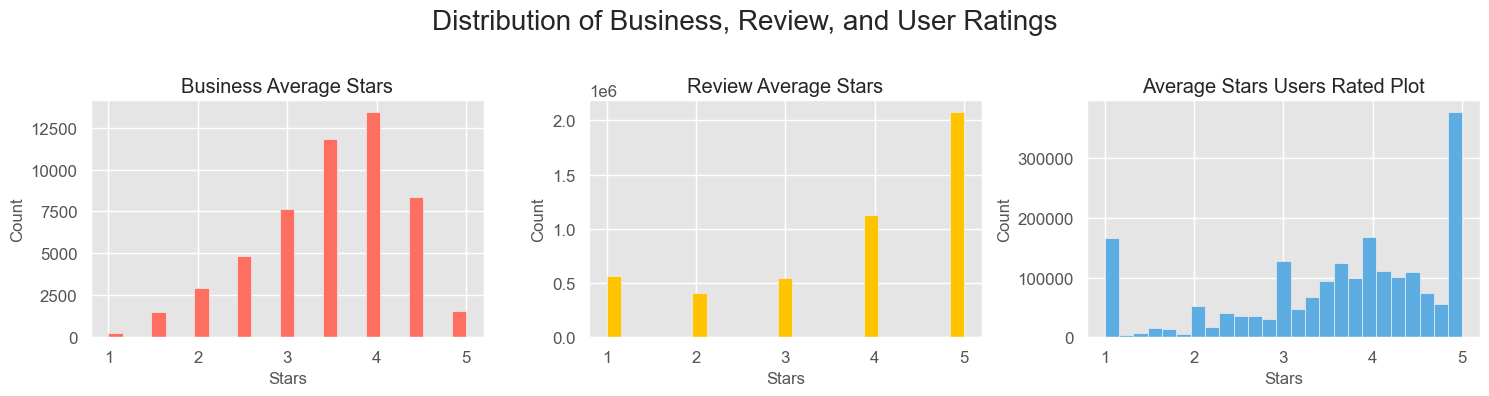

In [60]:
############################plots############################
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

#Business Average Stars Plot
axes[0].hist(business_restaurants['stars'], bins=25, color='#FF6F61')
axes[0].set_title("Business Average Stars")
axes[0].set_xlabel("Stars")
axes[0].set_ylabel("Count")

#Review Average Stars Plot
axes[1].hist(reviews_restaurants['stars'], bins=25, color='#FFC300')
axes[1].set_title("Review Average Stars")
axes[1].set_xlabel("Stars")
axes[1].set_ylabel("Count")

#Average Stars Users Rated Plot
axes[2].hist(users_df['average_stars'], bins=25, color='#5DADE2')
axes[2].set_title("Average Stars Users Rated Plot")
axes[2].set_xlabel("Stars")
axes[2].set_ylabel("Count")

plt.suptitle("Distribution of Business, Review, and User Ratings", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [46]:
############################Part 4 merging data############################
#since the business stars are the benchmark for this project, i add this benchmark to the review dataset
#business_id → stars
bus_stars_map = business_restaurants.set_index('business_id')['stars']

# Assign new column
reviews_restaurants['business_stars'] = reviews_restaurants['business_id'].map(bus_stars_map)

merged_df = reviews_restaurants.merge(
    users_df,
    on='user_id',
    how='left',
    suffixes=('', '_user') # some features related to user and reviews with the same name, so i seperate them by adding name _user
)


#quick check
print("\nMerged columns:")
print(merged_df.columns.tolist())
print(f"merged dataset shape: {merged_df.shape}")

# y = user rating − business average rating
merged_df['bias_value'] = merged_df['stars'] - merged_df['business_stars']

# abs bias 
merged_df['abs_bias'] = merged_df['bias_value'].abs()

# normalization
merged_df['credibility_score'] = np.exp(-merged_df['abs_bias'])

#quick check
print("\nquick check")
print(merged_df.columns.tolist())
print(f"dataset shape: {merged_df.shape}")


Merged columns:
['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'date', 'business_stars', 'review_count', 'average_stars', 'useful_user', 'funny_user', 'cool_user', 'fans', 'yelping_since']
merged dataset shape: (4724683, 16)

quick check
['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'date', 'business_stars', 'review_count', 'average_stars', 'useful_user', 'funny_user', 'cool_user', 'fans', 'yelping_since', 'bias_value', 'abs_bias', 'credibility_score']
dataset shape: (4724683, 19)


In [ ]:
#now we have the full dataset
df = merged_df.copy()


#change the date into a numeric number of how long this user started using yelp
df['yelping_since'] = pd.to_datetime(df['yelping_since'], errors='coerce')
df['account_age'] = (pd.Timestamp('today') - df['yelping_since']).dt.days / 365
df['account_age'] = df['account_age'].fillna(df['account_age'].median())
#the review date also need to be converted
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['review_age_days'] = (pd.Timestamp('today') - df['date']).dt.days
df['review_age_years'] = df['review_age_days'] / 365
df = df.drop(columns=['date'])
print(df.columns.tolist())
drop_cols = [
    'review_id', 'user_id', 'business_id',
    'stars', 'business_stars', 'bias_value',
    'yelping_since','review_age_years'
]
df_clean = df.drop(columns=drop_cols, errors='ignore')
print('\n clean_df')
print(df_clean.columns.tolist())


['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'business_stars', 'review_count', 'average_stars', 'useful_user', 'funny_user', 'cool_user', 'fans', 'yelping_since', 'bias_value', 'abs_bias', 'credibility_score', 'account_age', 'review_age_days', 'review_age_years']

 clean_df
['useful', 'funny', 'cool', 'review_count', 'average_stars', 'useful_user', 'funny_user', 'cool_user', 'fans', 'credibility_score', 'account_age', 'review_age_days']


/var/folders/d4/62tp_x3533dbk6ld1vy5z28c0000gn/T/ipykernel_2857/1770245244.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


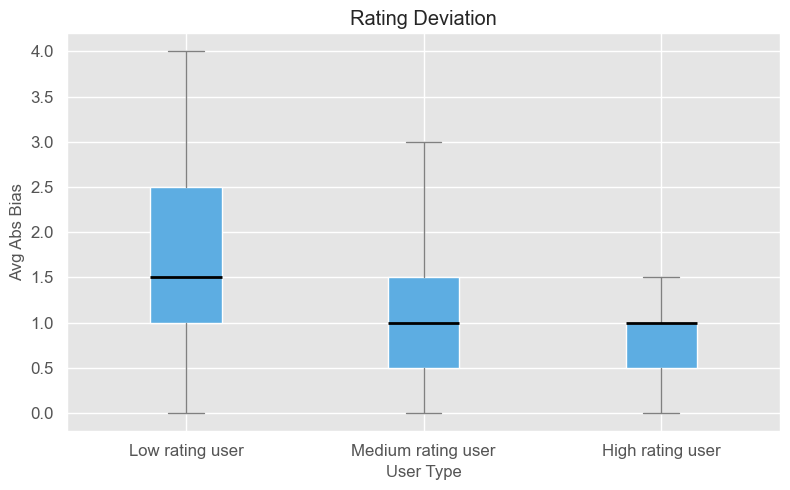

In [82]:
############################Rating Deviation by User Type############################
plot1 = df[['average_stars', 'abs_bias']].copy()#make a copy
# classify user types
def classify_user(x):
    if x < 3:
        return "Low rating user"
    elif x < 4:
        return "Medium rating user"
    else:
        return "High rating user"

plot1['user_group'] = plot1['average_stars'].apply(classify_user)
order = ["Low rating user", "Medium rating user", "High rating user"]
plt.figure(figsize=(8,5))
data_to_plot = [plot1.loc[plot1['user_group'] == g, 'abs_bias'] for g in order]

plt.boxplot(
    data_to_plot,
    labels=order,
    patch_artist=True,
    boxprops=dict(facecolor='#5DADE2', color='white'),
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='gray'),
    showfliers=False,
    capprops=dict(color='gray')
)

plt.xlabel("User Type")
plt.ylabel("Avg Abs Bias")
plt.title("Rating Deviation")
plt.tight_layout()
plt.show()

/var/folders/d4/62tp_x3533dbk6ld1vy5z28c0000gn/T/ipykernel_2857/130723123.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


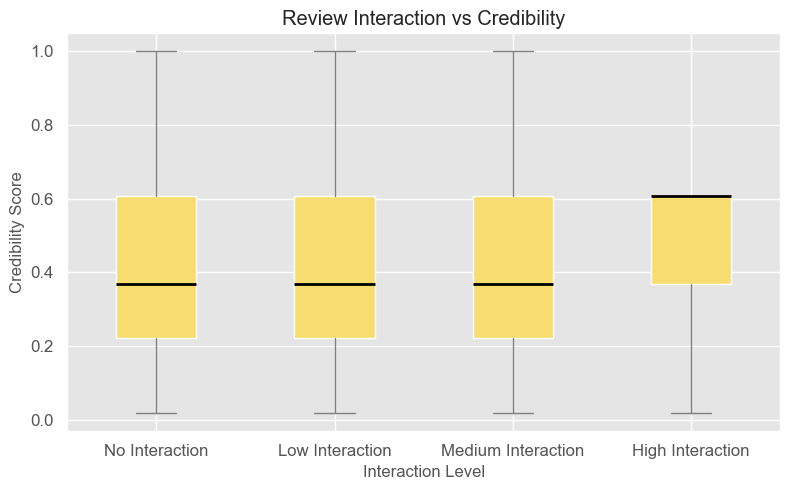

In [83]:
plot2 = df[['useful', 'funny', 'cool', 'credibility_score']].copy()
plot2['interaction'] = plot2['useful'] + plot2['funny'] + plot2['cool']

# 分类
def classify_interaction(x):
    if x == 0:
        return "No Interaction"
    elif x < 5:
        return "Low Interaction"
    elif x < 20:
        return "Medium Interaction"
    else:
        return "High Interaction"

plot2['interaction_group'] = plot2['interaction'].apply(classify_interaction)
order = ["No Interaction", "Low Interaction", "Medium Interaction", "High Interaction"]

# 绘图
plt.figure(figsize=(8,5))
data_to_plot = [plot2.loc[plot2['interaction_group'] == g, 'credibility_score'] for g in order]

plt.boxplot(
    data_to_plot,
    labels=order,
    patch_artist=True,
    boxprops=dict(facecolor='#F7DC6F', color='white'),
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray'),
    showfliers=False
)
plt.xlabel("Interaction Level")
plt.ylabel("Credibility Score")
plt.title("Review Interaction vs Credibility")
plt.tight_layout()
plt.show()


/var/folders/d4/62tp_x3533dbk6ld1vy5z28c0000gn/T/ipykernel_2857/430915110.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


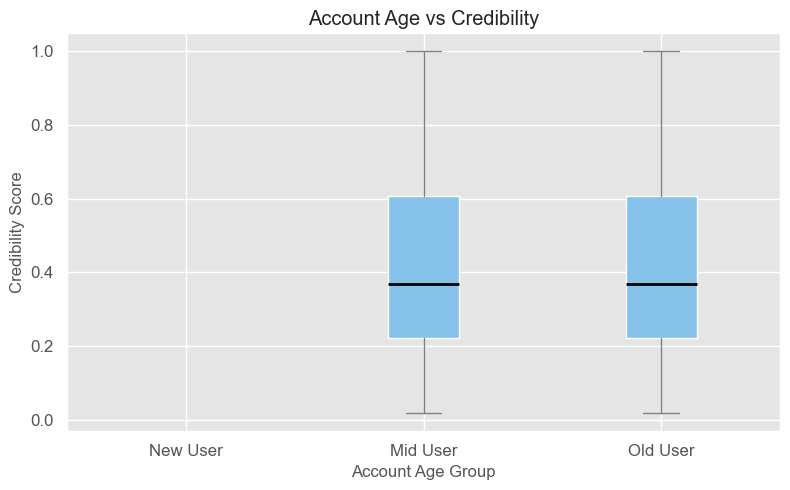

In [84]:
# --- 账户年龄 vs 可信度 ---
plot3 = df[['account_age', 'credibility_score']].copy()

def classify_age(x):
    if x < 2:
        return "New User"
    elif x < 5:
        return "Mid User"
    else:
        return "Old User"

plot3['age_group'] = plot3['account_age'].apply(classify_age)
order = ["New User", "Mid User", "Old User"]

plt.figure(figsize=(8,5))
data_to_plot = [plot3.loc[plot3['age_group'] == g, 'credibility_score'] for g in order]

plt.boxplot(
    data_to_plot,
    labels=order,
    patch_artist=True,
    boxprops=dict(facecolor='#85C1E9', color='white'),
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray'),
    showfliers=False
)
plt.xlabel("Account Age Group")
plt.ylabel("Credibility Score")
plt.title("Account Age vs Credibility")
plt.tight_layout()
plt.show()


/var/folders/d4/62tp_x3533dbk6ld1vy5z28c0000gn/T/ipykernel_2857/1168023057.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


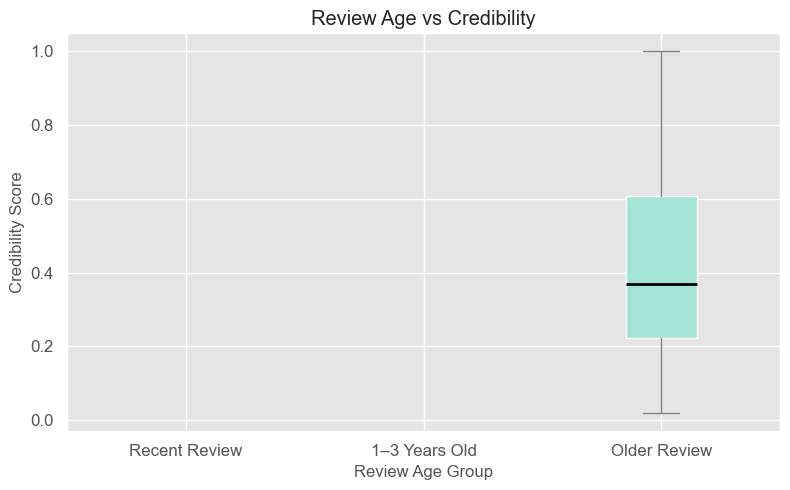

In [85]:
# --- 评论时间 vs 可信度 ---
plot4 = df[['review_age_days', 'credibility_score']].copy()
plot4['review_age_years'] = plot4['review_age_days'] / 365

def classify_review_age(x):
    if x < 1:
        return "Recent Review"
    elif x < 3:
        return "1–3 Years Old"
    else:
        return "Older Review"

plot4['review_group'] = plot4['review_age_years'].apply(classify_review_age)
order = ["Recent Review", "1–3 Years Old", "Older Review"]

plt.figure(figsize=(8,5))
data_to_plot = [plot4.loc[plot4['review_group'] == g, 'credibility_score'] for g in order]

plt.boxplot(
    data_to_plot,
    labels=order,
    patch_artist=True,
    boxprops=dict(facecolor='#A3E4D7', color='white'),
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray'),
    showfliers=False
)
plt.xlabel("Review Age Group")
plt.ylabel("Credibility Score")
plt.title("Review Age vs Credibility")
plt.tight_layout()
plt.show()


In [ ]:
############################Part 5 preprocessing data############################
#now we have the full dataset
df = merged_df.copy()
drop_cols = ['text', 'name_business', 'categories', 'city', 'state'] # we don't need to know at this point what the reviews wrote, the business name and the categories, and hte cities
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')
#check the missing values
print(df.shape)
print(df.isna().sum().sum(), "missing values remaining")



(4724683, 21)
98 missing values remaining


In [ ]:

#some cols should be scaled to be normalized
feature_cols = [
    'stars_review', 'stars_business', 'review_count',
    'average_stars', 'useful', 'funny', 'cool',
    'fans', 'account_age'
]

'stars_review', 'useful', 'funny', 'cool', 'date', 'name', 'city', 'state', 'stars_business', 'review_count', 'review_count_user', 'average_stars', 'useful_user', 'funny_user', 'cool_user', 'fans', 'yelping_since'
X = df[feature_cols]
y = df['credibility_score']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
random_state=42
# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)




['review_id', 'user_id', 'business_id', 'stars_review', 'useful_x', 'funny_x', 'cool_x', 'date', 'name', 'stars_business', 'review_count_x', 'review_count_y', 'average_stars', 'useful_y', 'funny_y', 'cool_y', 'fans', 'yelping_since', 'bias_value', 'abs_bias', 'credibility_score', 'account_age']
